In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_csv = '/content/gdrive/MyDrive/diabetes(1).csv'

In [3]:
# 1) Use the use case in the class: Add more Dense layers to the existing code and check how the accuracy changes.
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.1, random_state=30)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(16, activation='relu', input_shape=(8,)))
my_first_nn.add(Dense(8, activation='relu'))
my_first_nn.add(Dense(64, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))
my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.4072 - acc: 0.5514
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3478 - acc: 0.6483
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3467 - acc: 0.6469
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3382 - acc: 0.6440
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3114 - acc: 0.6310
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2798 - acc: 0.6339
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2405 - acc: 0.6483
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2269 - acc: 0.6556
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2238 - acc: 0.6700
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2292 - acc: 0.6671
Epoch 11/100
22/22 [==============================] - 0s 1m

In [6]:
# (2.1) We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
import keras
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 22ms/step - loss: 0.3332 - accuracy: 0.8980 - val_loss: 0.2159 - val_accuracy: 0.9344
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1476 - accuracy: 0.9557 - val_loss: 0.1847 - val_accuracy: 0.9428
Epoch 3/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0981 - accuracy: 0.9709 - val_loss: 0.1033 - val_accuracy: 0.9681
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.1083 - val_accuracy: 0.9639
Epoch 5/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0738 - val_accuracy: 0.9757
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0745 - val_accuracy: 0.9761
Epoch 7/10
235/235 [==============================] - 7s 30ms/st

In [9]:
# 2.2) Run the same code without scaling the images and check the performance?
import keras
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
# Process the data
# 1. Convert each image of shape 28*28 to 784 dimensional, which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float (no scaling)
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# Change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 25ms/step - loss: 0.4886 - accuracy: 0.8663 - val_loss: 0.2099 - val_accuracy: 0.9396
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1724 - accuracy: 0.9499 - val_loss: 0.1357 - val_accuracy: 0.9591
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1347 - accuracy: 0.9601 - val_loss: 0.1183 - val_accuracy: 0.9634
Epoch 4/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1145 - accuracy: 0.9659 - val_loss: 0.1180 - val_accuracy: 0.9645
Epoch 5/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1004 - accuracy: 0.9700 - val_loss: 0.1256 - val_accuracy: 0.9617
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0954 - accuracy: 0.9710 - val_loss: 0.1091 - val_accuracy: 0.9658
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0872 - accuracy: 0.9735 - val_loss: 0.1032 - val_acc

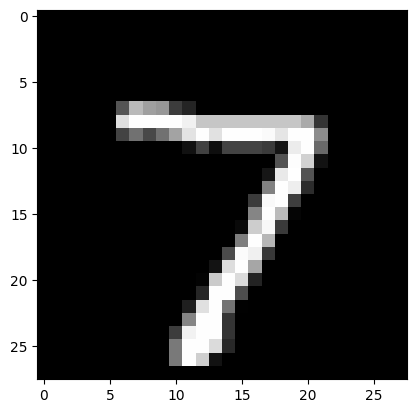

1/1 [==============================] - 0s 186ms/step
Predicted Class: 7


In [7]:
# 2.3) Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
import matplotlib.pyplot as plt

# Choose an index to plot a test image
index = 0

# Plot the selected test image
plt.imshow(test_images[index], cmap='gray')
plt.show()

# Make a prediction on the selected test image
image = test_data[index].reshape(1, -1)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")
